## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

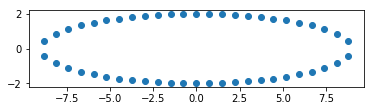

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [5]:
def draw_line(coef,intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + coef * x_vals
    plt.plot(x_vals, y_vals,)

#     # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
#     # to draw the hyper plane we are creating two points
#     # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
#     # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
#     points=np.array([[((-coef*mi - intercept)/coef), mi],[((-coef*ma - intercept)/coef), ma]])
#     plt.plot(points[:,0], points[:,1])
#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib

In [6]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
Xd = X.copy()
Yd = Y.copy()

In [7]:
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 

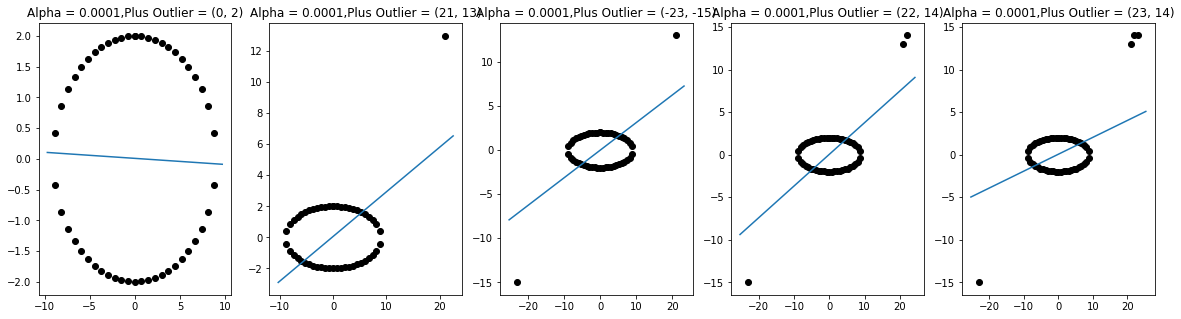

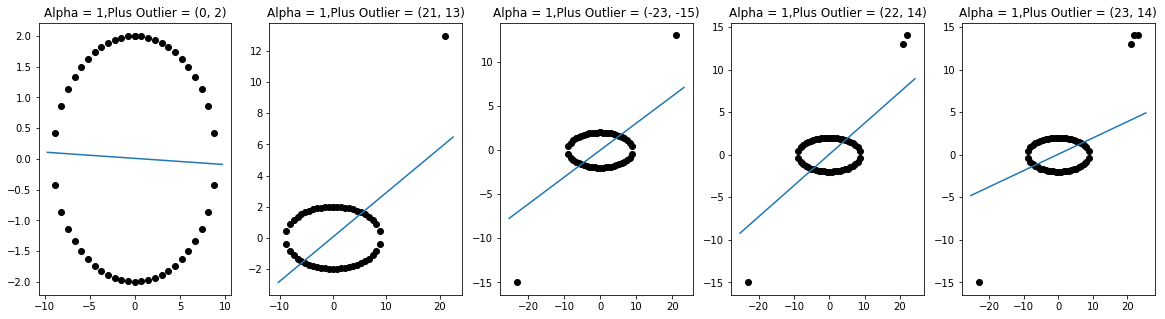

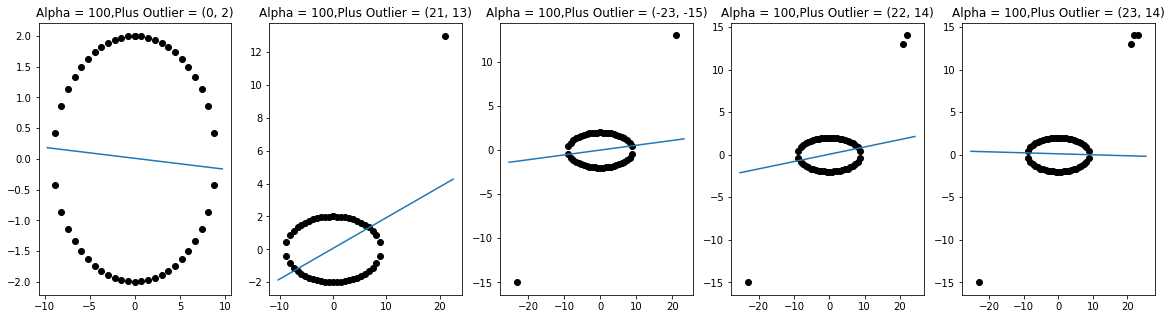

In [12]:
alpha=[0.0001, 1, 100]
for k in alpha:
    X,Y = Xd,Yd
    plt.figure(figsize=(20,5))
    for i,j in enumerate(outliers):
        plt.subplot(1, 5, i+1)        
        X=np.append(X,j[0])
        Y=np.append(Y,j[1])
        X = X.reshape(-1,1)
        Y = Y.reshape(-1,1)
        reg = SGDRegressor(alpha=k, eta0=0.001,penalty='l2',learning_rate='constant',random_state=0)
        reg.fit(X,Y)
        coef= reg.coef_[0]
        intercept = reg.intercept_[0]
        #print(reg,coef,intercept)
        plt.scatter(X,Y, color = 'black')
        draw_line(coef,intercept)
        plt.title("Alpha = "+ str(k)+",Plus Outlier = ("+str(j[0])+", "+str(j[1])+")")       
    plt.show()    
    

In [9]:
#https://scikit-learn.org/stable/modules/sgd.html#sgd
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

Outliers affect Linear regression a dramatically. This engenders the need for Regularisation

1. From above Grid it can be seen that the position of the hyper plane changes dramtically with introducing an outlier. These outliers are called influencial outliers.

2. in the absence of regularisation the model relies highly on the squared loss term. this term depends on the distance of a point from the hyper plane. As the first influencial outlier( the point away from the cluster) is introduced the model with lower alpha(less regularisation strength) will try to over fit the model with the new outler point.

3. As new outlier points are added around the vicinity of the earlier outlier point the model has less impact as the point becomes a leverage outlier in this case.

4. The model behaves similarly with C=1, This shows that the regularization strength is not enough to handle the outliers and the model is still trying to overfit the line

5. With C=100, with higher regularization strength, there is enough bias that is introduced, as a result the model is not trying to overfit the model to all the points. The regularization term forces the value of W(the wieght vector) to be low and hence stopping the loss term to overfit the model.